In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      2.1.0
anyio                        3.7.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
async-timeout                4.0.2
attrs                        23.1.0
backcall                     0.2.0
beautifulsoup4               4.9.1
bleach                       6.0.0
blinker                      1.6.2
boltons                      23.0.0
brotlipy                     0.7.0
bs4                          0.0.1
certifi                      2023.5.7
cffi                         1.15.1
chardet                      3.0.4
charset-normalizer           2.0.4
click                        7.1.2
colorama                     0.4.6
comm                         0.1.3
conda                        23.5.0
conda-content-trust          0.1.3
conda-package-handling       2.0.2
conda

In [45]:
car_path = "C:/Users/anilk/Downloads/Deep-Learning-ANN-main/Deep-Learning-ANN-main/car1 (1).jpeg"
img = cv2.imread(car_path)

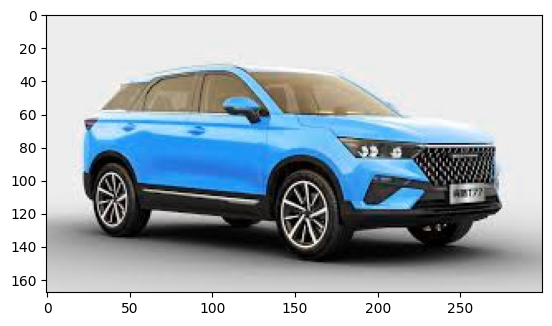

In [4]:
plt.imshow(img)

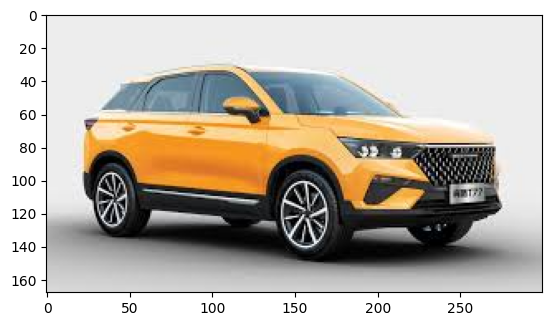

In [5]:
#in above img order of image is changed 
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

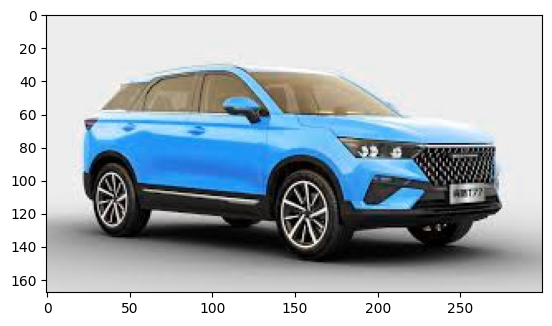

In [6]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap ="gray")

In [7]:
img.shape

(168, 300, 3)

(168, 300)

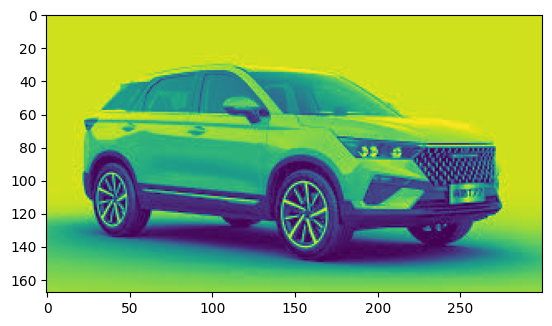

In [8]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)
img.shape

In [29]:
row, col=img.shape

In [30]:
car = img.reshape(1,row,col,1)

In [31]:
Conv_layer =[tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape= car.shape[1:]
)]

In [32]:
cov_model =tf.keras.Sequential(Conv_layer)

In [33]:
cov_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 166, 298, 1)         │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

Why we get 20 trainable paramter?


Our 2 filter size is 3*3 means 18 values , + 2 bias

In [34]:
output= cov_model.predict(car)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [35]:
output.shape

(1, 166, 298, 1)

In [36]:
row,col = output.shape[1:-1]
print(row,col)

166 298


In [37]:
reshape_output= output.reshape(row,col)

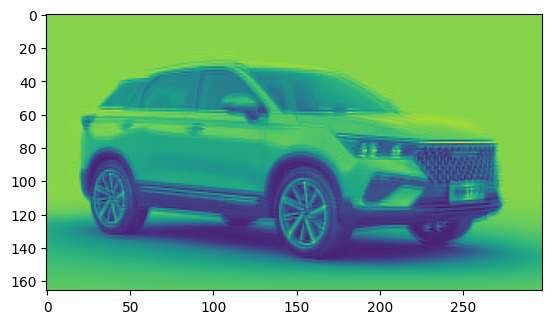

In [40]:
plt.imshow(reshape_output)

Feature map is always one channel

In [74]:
def reshaping_in(img,grayscale=True):
    if grayscale:
        row,col = img.shape
        img = img.reshape(1,row,col,1)
        return img
    row,col,depth = img.shape
    color_img = img.reshape(1,row,col,depth)
    return color_img

In [75]:
def max_pooling(img,pool_size=(2,2), strides=(2,2)):
    reshaped_img = reshaping_in(img, grayscale= False)
    pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size,strides=strides)
    result = pooling_layer(reshaped_img)
    return result

In [78]:
reshape_output= output.reshape(row,col,1)
result= max_pooling(reshape_output)

In [80]:
result.shape

TensorShape([1, 83, 149, 1])

In [81]:
def plot(result):
    _,row,col,_ = result.shape
    reshaped_img = tf.reshape(result,(row,col,1))
    plt.imshow(reshaped_img)

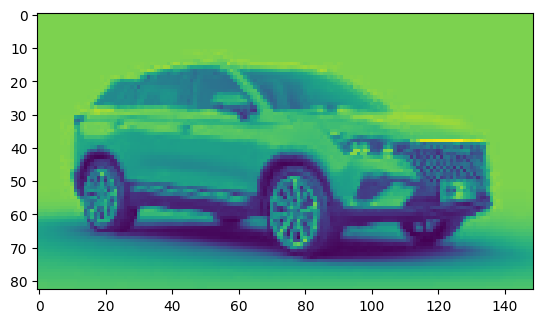

In [82]:
plot(result)

In [102]:
def get_conv_model(filters=1,filter_size=(3,3),strides=(1,1),input_shape=None,padding="valid"):
    CONV_LAYER = [tf.keras.layers.Conv2D(filters=filters,
                                        kernel_size=filter_size,
                                        strides=(1,1),
                                        input_shape=input_shape,
                                        padding=padding
                                        )]
    conv_model = tf.keras.Sequential(CONV_LAYER)
    conv_model.summary()
    return conv_model

In [103]:
def apply_conv_and_visualize(img,conv_model):
    try:
        out = conv_model.predict(img)
        print(out.shape)
        row,col,depth = out.shape[1:]
        reshape_out =out.reshape(row,col,depth)
        
        for d in range(depth):
            plt.imshow(reshape_out[:,:,d],cmap="gray")
            plt.show()
    except Exception as e:
        raise e
        


In [104]:
input_img = reshaping_in(img,grayscale=False)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 166, 298, 10)        │             280 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 280 (1.09 KB)

 Trainable params: 280 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
(1, 166, 298, 10)


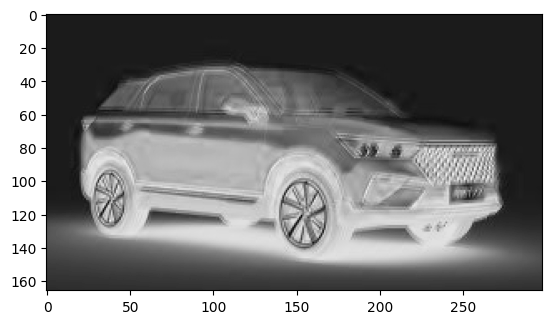

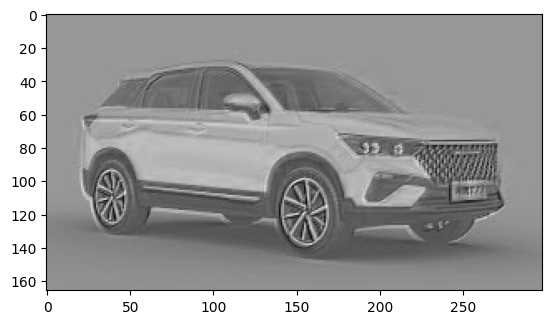

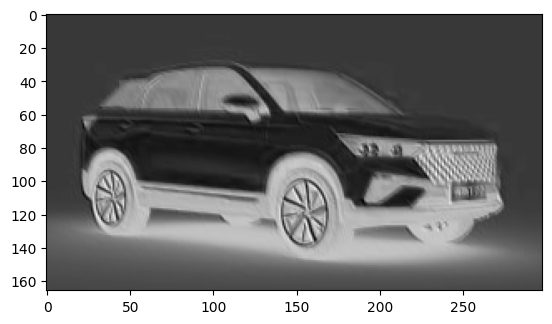

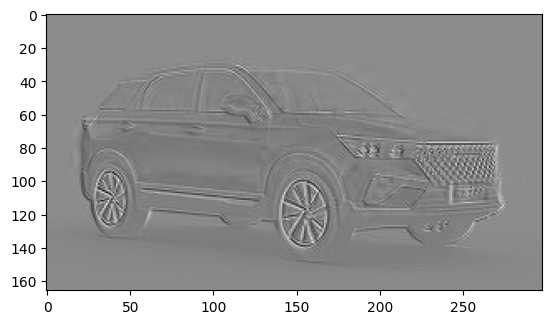

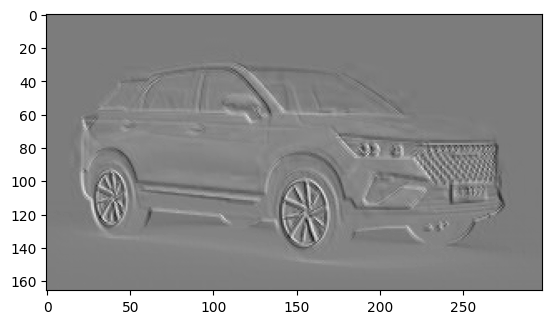

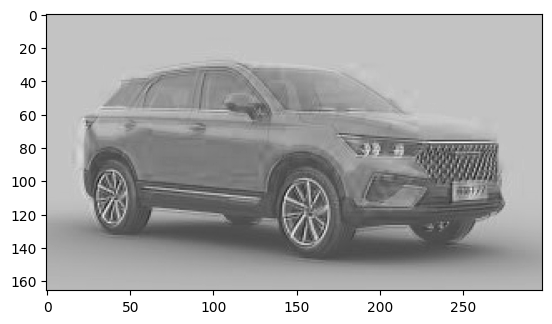

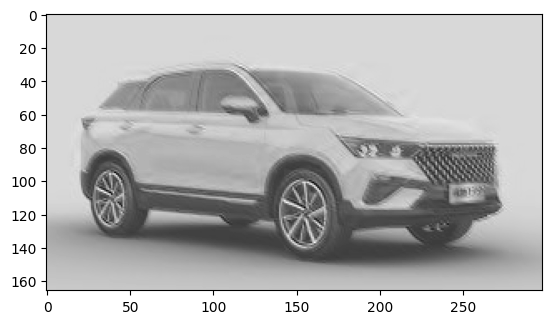

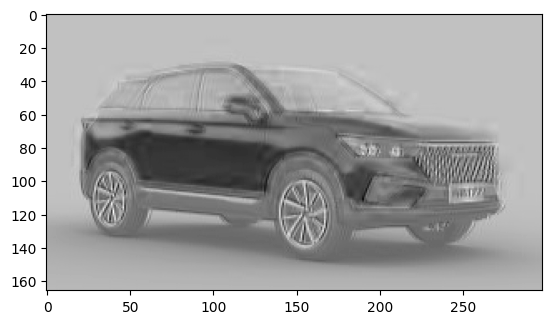

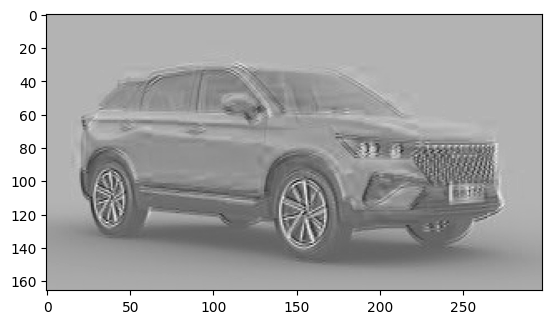

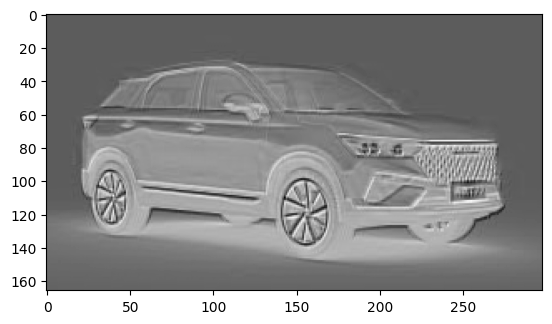

In [105]:
model= get_conv_model(filters=10,filter_size=(3,3),strides =(1,1),input_shape=input_img.shape[1:])
apply_conv_and_visualize(input_img,model)

Above is random filter assigned by keras & when there is backpropogation it is going to refined 

it is only covolution step